In [40]:
import cv2
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

In [41]:
mpl.rcParams['agg.path.chunksize'] = 10000
image = cv2.imread("minecraft.jpg", 0)
key_image = cv2.imread("city.jpg", 0)
key_image.resize(image.shape)
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("Key Image", key_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(image.shape)
print(key_image.shape)

(1024, 2304)
(1024, 2304)


In [43]:
def fusion(image, key_image, w):
    matr_image = np.asarray(image)
    matr_key_image = np.asarray(key_image)
    matr_fused_image = np.zeros(image.shape)
    matr_fused_image = (w*(matr_key_image-matr_image)+matr_image)
    img = Image.fromarray(matr_fused_image)
    img.show()
    print(np.size(matr_fused_image))
    return matr_fused_image

In [44]:
def henon_attractor(x, y, a=1.4, b=0.3):
	x_next = 1 - a * x ** 2 + y
	y_next = b * x
	return x_next, y_next

In [51]:
def encrypt(matr_fused_image, a, b, x, y):
    size = np.size(matr_fused_image)
    x_array = np.zeros(size+1)
    y_array = np.zeros(size+1)
    y_array[0] = 0
    x_array[0] = 0
    for i in range(size):
        x_next, y_next = henon_attractor(x_array[i], y_array[i])
        x_array[i+1] = x_next
        y_array[i+1] = y_next

    # print(x_array, y_array)
    plt.scatter(x_array, y_array, marker='.')
    # plt.plot(x_array, y_array, 'ro', linestyle="None")
    plt.show()

    #################ENCRYPTION##################


2359296


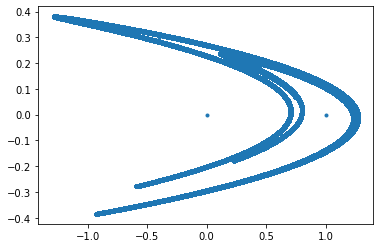

In [52]:
# w = random.random()
img = fusion(image, key_image, 0.9)
encrypt(img, 1.3, 0.6, 1.2, 0.5)